In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('df_ls.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51911 entries, 0 to 51910
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            51911 non-null  int64  
 1   Unnamed: 0              51911 non-null  int64  
 2   Sample ID               51911 non-null  float64
 3   Grab ID                 51911 non-null  float64
 4   Profile ID              51911 non-null  float64
 5   Sample Number           51911 non-null  object 
 6   Collect DateTime        51911 non-null  object 
 7   Depth (m)               51911 non-null  float64
 8   Site Type               51911 non-null  object 
 9   Area                    51911 non-null  object 
 10  Locator                 51911 non-null  object 
 11  Site                    51911 non-null  object 
 12  Parameter               51911 non-null  object 
 13  Value                   51911 non-null  float64
 14  Units                   51911 non-null

In [ ]:
df.nunique()

Unnamed: 0.1              51911
Unnamed: 0                51911
Sample ID                 15980
Grab ID                   15846
Profile ID                 2060
Sample Number             15980
Collect DateTime          13025
Depth (m)                   222
Site Type                     1
Area                          1
Locator                       8
Site                          8
Parameter                    20
Value                      3469
Units                         7
QualityId                     6
MDL                          59
RDL                         100
Method                       97
Date Analyzed              2272
Data Source                   1
Time_difference            5468
Normalised_value(mg/L)     3676
dtype: int64

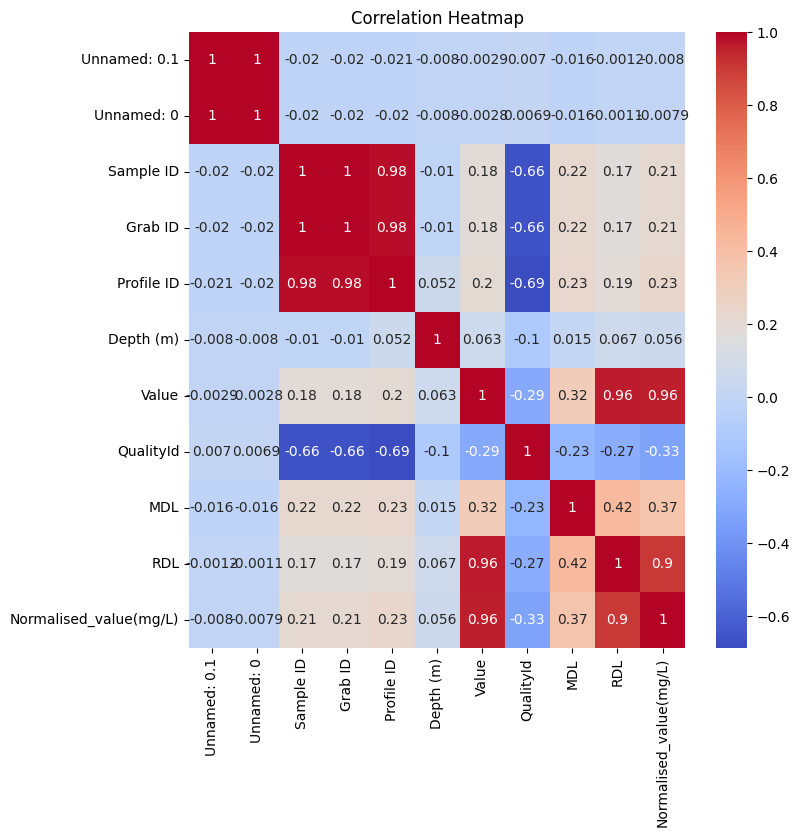

In [ ]:
plt.figure(figsize=(8, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Depth does not show a strong correlation with other parameters. This might mean that the depth at which the sample was taken does not have a strong linear relationship with the values measured or the quality index.
- 'Normalised_value(mg/L)' shows a very strong positive correlation with 'RDL' (Reporting Detection Limit), which implies that as the concentration of parameter being measured increases, the reporting detection limit . The negative correlation with 'QualityId' suggests that higher values may be associated with lower quality identifiers.
- QualityID has a moderate negative correlation with 'Value', 'MDL', and 'RDL'. This could indicate that samples with a lower quality identification number are associated with higher detected values and detection limits.



##Analysis based on Depth

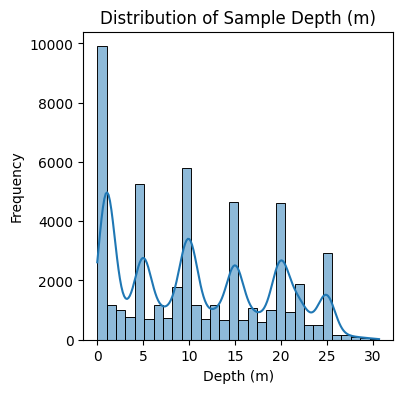

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(df["Depth (m)"], bins=30, kde=True)
plt.title('Distribution of Sample Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.show()

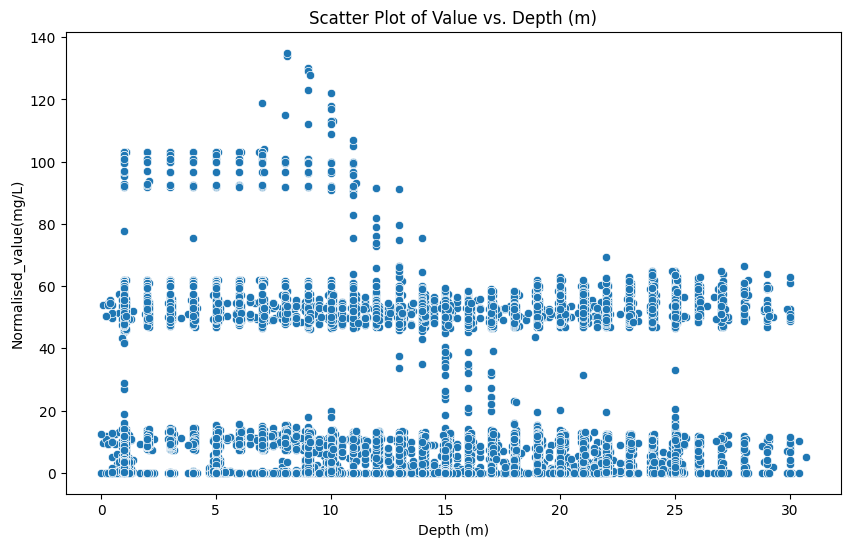

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth (m)', y='Normalised_value(mg/L)', data=df)
plt.title('Scatter Plot of Value vs. Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Normalised_value(mg/L)')
plt.show()

In [ ]:
#'Collect DateTime' to datetime format
df['Collect DateTime'] = pd.to_datetime(df['Collect DateTime'], errors='coerce')


In [ ]:
# Basic statistics for 'Depth (m)' and 'Value'
depth_stats = df['Depth (m)'].describe()
value_stats = df['Normalised_value(mg/L)'].describe()
depth_stats, value_stats

(count    51911.000000
 mean        11.077853
 std          7.918562
 min          0.000000
 25%          4.900000
 50%         10.000000
 75%         18.100000
 max         30.700000
 Name: Depth (m), dtype: float64,
 count    51911.000000
 mean         9.808017
 std         19.100488
 min          0.000031
 25%          0.010000
 50%          0.392647
 75%          8.410000
 max        135.000000
 Name: Normalised_value(mg/L), dtype: float64)

##Analysis based on Parameters and Year





In [ ]:
parameter_overview = df['Parameter'].value_counts()
parameter_overview.head(10)

Conductivity, Field           7653
Chlorophyll, Field            7102
Dissolved Oxygen, Field       6996
Total Phosphorus              5153
Total Nitrogen                4841
Nitrite + Nitrate Nitrogen    4122
Orthophosphate Phosphorus     2552
Ammonia Nitrogen              2329
Total Suspended Solids        2253
Total Alkalinity              2085
Name: Parameter, dtype: int64

In [ ]:
top_parameters = parameter_overview.head(5).index.tolist()
top_parameters

['Conductivity, Field',
 'Chlorophyll, Field',
 'Dissolved Oxygen, Field',
 'Total Phosphorus',
 'Total Nitrogen']

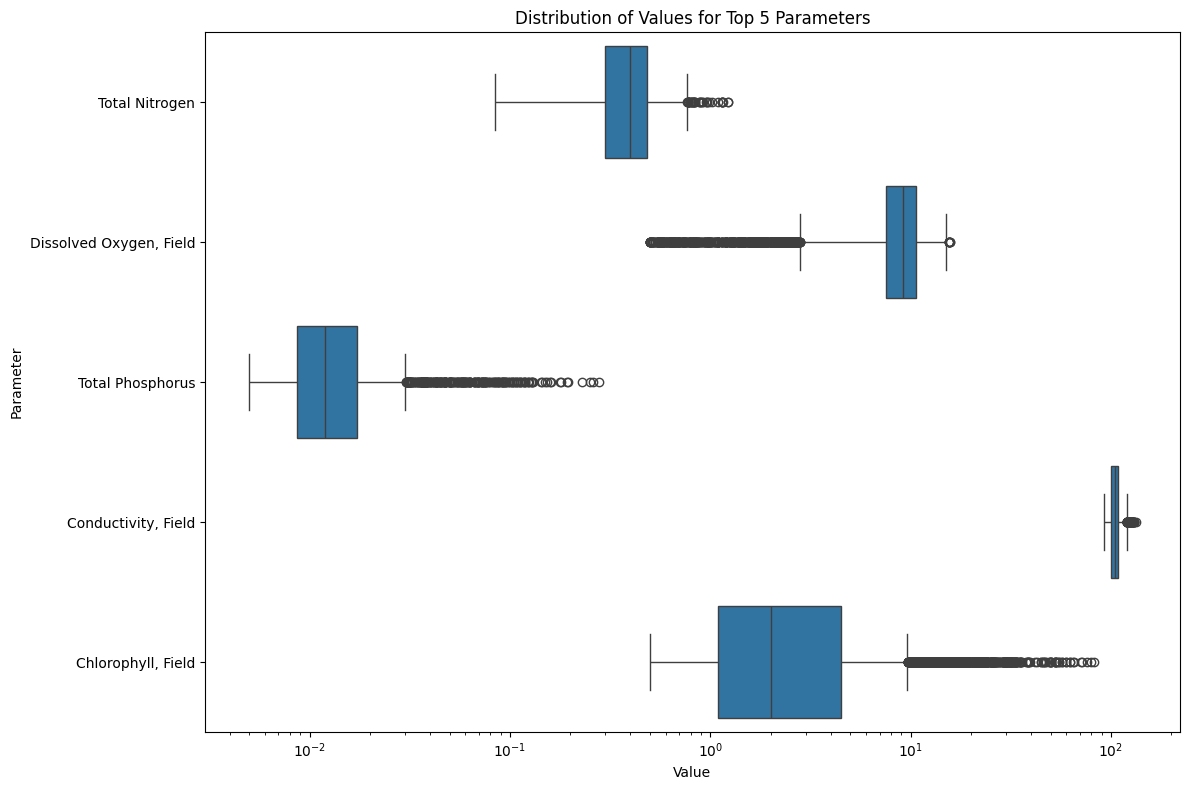

In [ ]:
top_parameters_df = df[df['Parameter'].isin(top_parameters)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='Parameter', data=top_parameters_df)
plt.title('Distribution of Values for Top 5 Parameters')
plt.xlabel('Value')
plt.ylabel('Parameter')
plt.xscale('log')
plt.tight_layout()
plt.show()

The above parameters provide insights into various aspects of water quality and health

Wide Range of Values: All parameters show a wide range of values, as indicated by the span of the boxes and the whiskers in the box plot.
This suggests variability in water quality and the presence of different conditions across the sampled locations and times.

Outliers: Outliers indicate measurements that are significantly higher or lower than the typical range of values. In the context of water quality,
high outliers could point to pollution events, algal blooms, or other environmental factors affecting the water body.

Skewed Distributions: The distributions of parameters like Total Phosphorus and Total Nitrogen are right-skewed,
meaning there are a higher number of lower values and fewer high values.

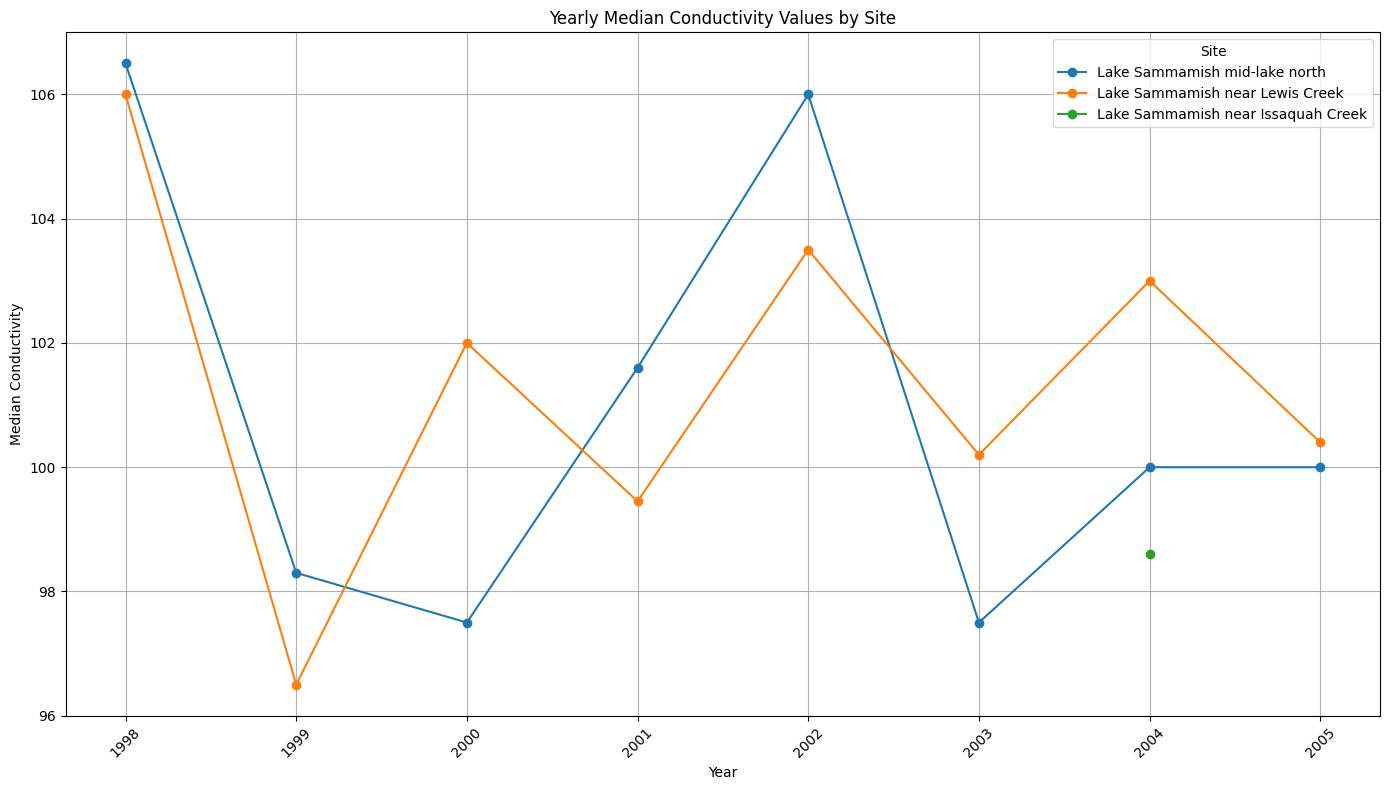

In [ ]:

CF_df = df[df['Parameter'] == 'Conductivity']

median_CF_by_year_site = CF_df.groupby(['Year', 'Site'])['Value'].median().unstack()
plt.figure(figsize=(14, 8))
selected_sites = median_CF_by_year_site.count().sort_values(ascending=False).head(5).index

for site in selected_sites:
    plt.plot(median_CF_by_year_site.index, median_CF_by_year_site[site], marker='o', label=site)

plt.title('Yearly Median Conductivity Values by Site')
plt.xlabel('Year')
plt.ylabel('Median Conductivity')
plt.legend(title='Site')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis of yearly median conductivity values across selected sites shows variability in water ionic content,
indicating differences in salinity or pollution levels.

Some sites demonstrate consistent trends over time,
suggesting changes in environmental conditions or impacts of management practices. This highlights the significance of monitoring conductivity for assessing water quality and the effectiveness of environmental management strategies.


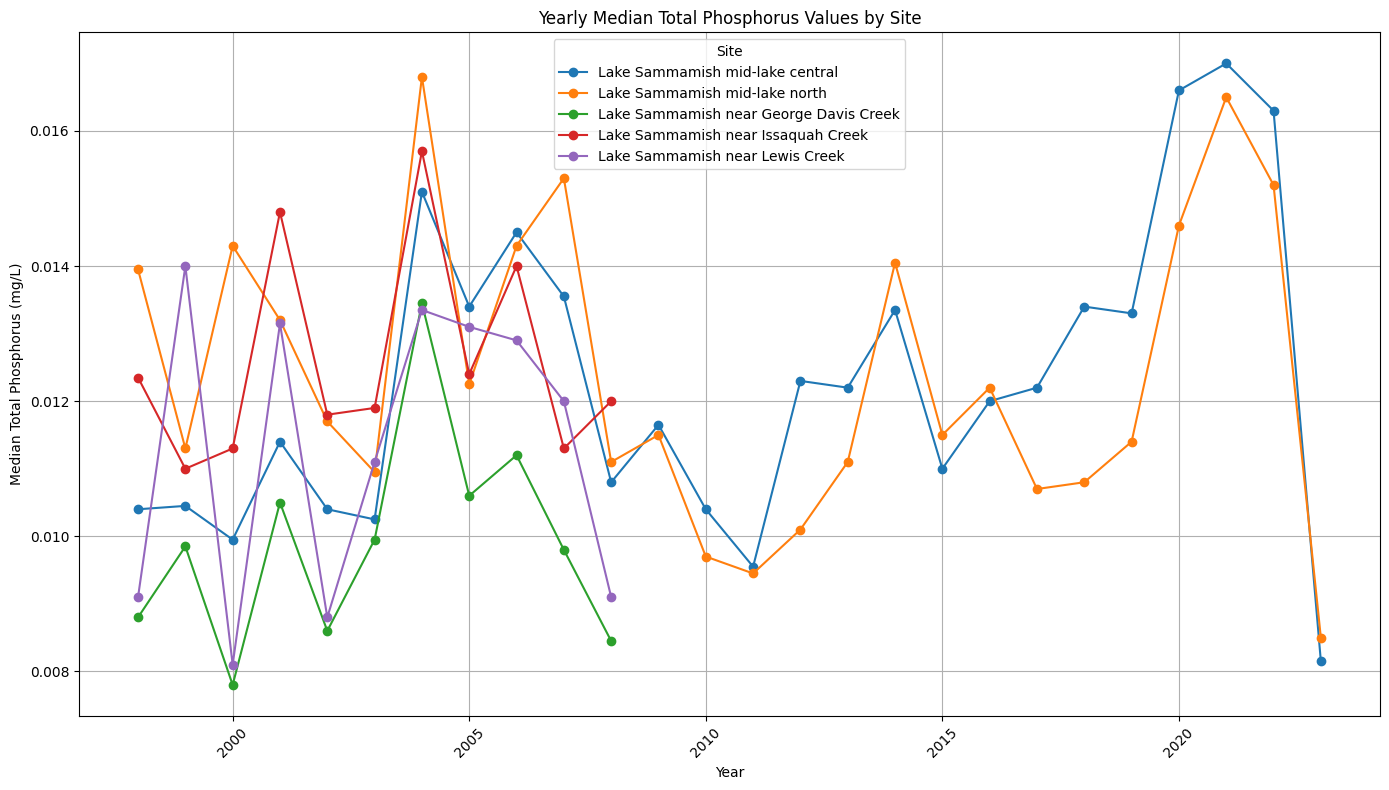

In [ ]:

ph_df = df[df['Parameter'] == 'Total Phosphorus']

median_ph_by_year_site = ph_df.groupby(['Year', 'Site'])['Value'].median().unstack()

# Plotting the trends over time for different sites
plt.figure(figsize=(14, 8))

# Due to the potentially large number of sites, we'll limit our plot to a manageable number of sites
# Selecting sites with the most data points for clarity
selected_sites = median_ph_by_year_site.count().sort_values(ascending=False).head(5).index

for site in selected_sites:
    plt.plot(median_ph_by_year_site.index, median_ph_by_year_site[site], marker='o', label=site)

plt.title('Yearly Median Total Phosphorus Values by Site')
plt.xlabel('Year')
plt.ylabel('Median Total Phosphorus (mg/L)')
plt.legend(title='Site')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The analysis of yearly median Total Phosphorus values reveals variable trends across different sites,
highlighting locations with potential nutrient management issues. Some sites show upward or downward trends,
indicating changes in nutrient inputs or effectiveness of management practices.

This underscores the importance of targeted interventions and continuous monitoring to address water quality concerns,
especially eutrophication risks.

In [ ]:
# median value for each parameter by year, as the median is less affected by outliers

median_year = df.groupby(['Year', 'Parameter'])['Value'].median().unstack()
median_year

Parameter,Ammonia Nitrogen,"BGA PC, Field",Chlorophyll a,"Chlorophyll, Field",Conductivity,"Conductivity, Field",Dissolved Organic Carbon,"Dissolved Oxygen Saturation, Field","Dissolved Oxygen, Field","Hardness, Calc",Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Pheophytin a,Silica,Total Alkalinity,Total Nitrogen,Total Organic Carbon,Total Phosphorus,Total Suspended Solids,Turbidity
Year,,,,,,,,,,,,,,,,,,,,
1998,0.02040,NaN,2.750,NaN,106.0,NaN,NaN,NaN,NaN,NaN,0.3400,0.009130,0.60,NaN,38.80,0.4845,2.040,0.01100,NaN,1.10
1999,0.01900,NaN,4.800,NaN,97.4,NaN,NaN,NaN,NaN,39.00,0.4010,0.008785,8.50,NaN,37.30,0.5750,2.430,0.01120,NaN,1.30
2000,0.02130,NaN,3.600,NaN,100.0,NaN,NaN,NaN,NaN,38.70,0.3660,0.006760,0.60,NaN,37.90,0.5495,3.180,0.00980,NaN,0.90
2001,0.01500,NaN,3.400,NaN,99.5,NaN,NaN,NaN,NaN,41.45,0.1870,0.007900,0.94,NaN,42.05,0.3510,3.475,0.01195,NaN,1.10
2002,0.02000,NaN,3.380,NaN,106.0,NaN,3.390,NaN,NaN,40.05,0.2930,0.004300,0.58,6.475,39.70,0.4665,4.000,0.01055,1.785,1.10
2003,0.01400,NaN,3.095,NaN,97.5,NaN,3.460,NaN,NaN,NaN,0.2385,0.006970,6.12,8.330,41.80,0.4140,3.820,0.01100,1.000,0.86
2004,0.01400,NaN,2.830,NaN,100.5,NaN,3.400,NaN,NaN,NaN,0.2820,0.007160,1.20,10.000,40.90,0.4450,3.960,0.01460,1.150,1.00
2005,0.01600,NaN,2.870,NaN,100.0,NaN,3.195,NaN,NaN,NaN,0.2510,0.006265,1.10,10.800,42.30,0.4190,3.770,0.01230,0.900,1.10
2006,0.02250,NaN,3.960,NaN,NaN,NaN,3.140,NaN,NaN,43.70,0.3270,0.008120,2.10,9.960,40.80,0.5100,3.620,0.01380,1.600,1.20


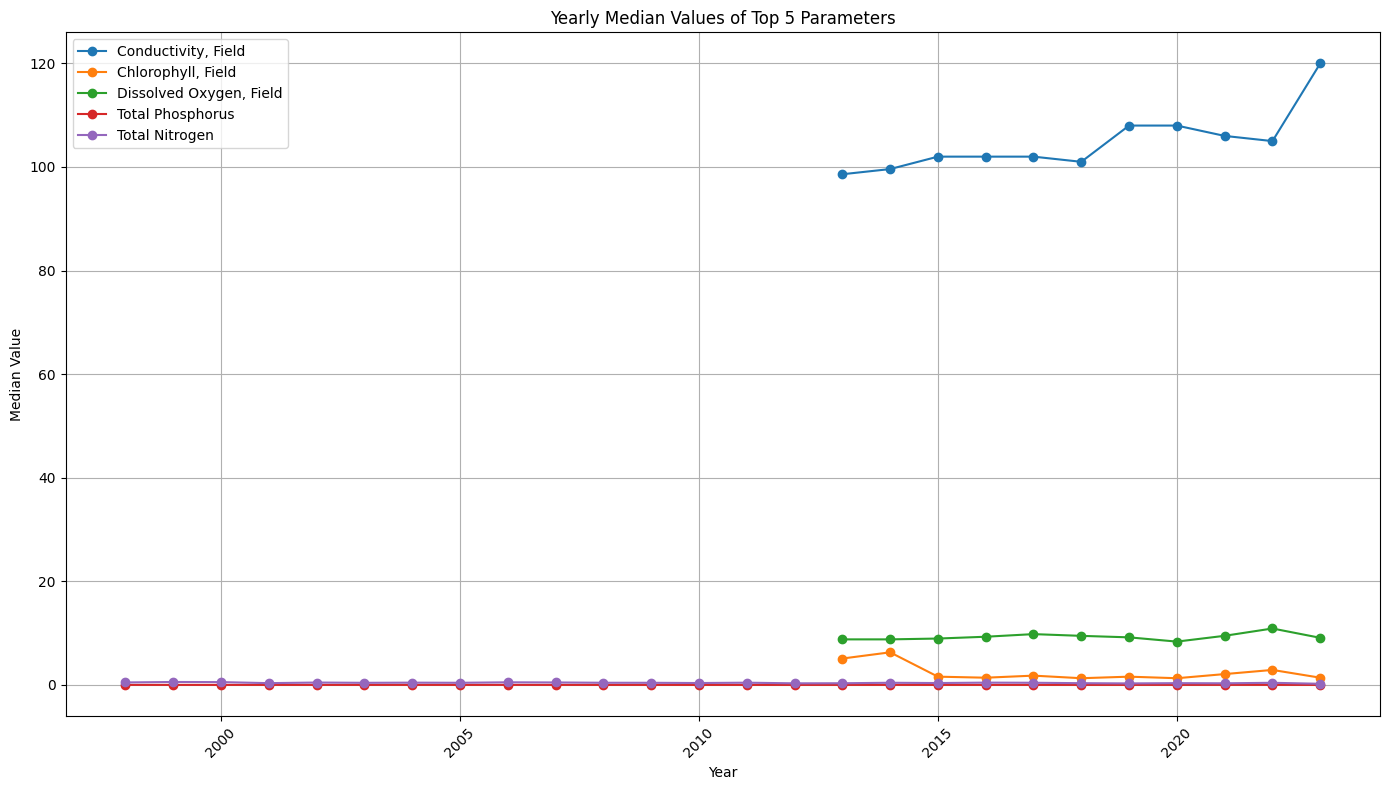

In [ ]:
# Selecting only the top 5 parameters for visualization
top_parameters_by_year = median_year[top_parameters]
plt.figure(figsize=(14, 8))
for parameter in top_parameters:
    plt.plot(top_parameters_by_year.index, top_parameters_by_year[parameter], marker='o', label=parameter)

plt.title('Yearly Median Values of Top 5 Parameters')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conductivity and Dissolved Oxygen appear relatively stable over the years, suggesting consistent conditions regarding
the ionic content and oxygen availability in the water, respectively. However, minor fluctuations could be related to variations in rainfall,
temperature, and other environmental factors.

Chlorophyll, Total Phosphorus, and Total Nitrogen show more noticeable fluctuations. These parameters are closely related
to biological activity in the lake and are likely influenced by nutrient inputs and other factors that affect algal growth.

Fluctuations in Total Phosphorus and Total Nitrogen could point to changes in external nutrient inputs,
such as agricultural runoff or urban wastewater discharges.

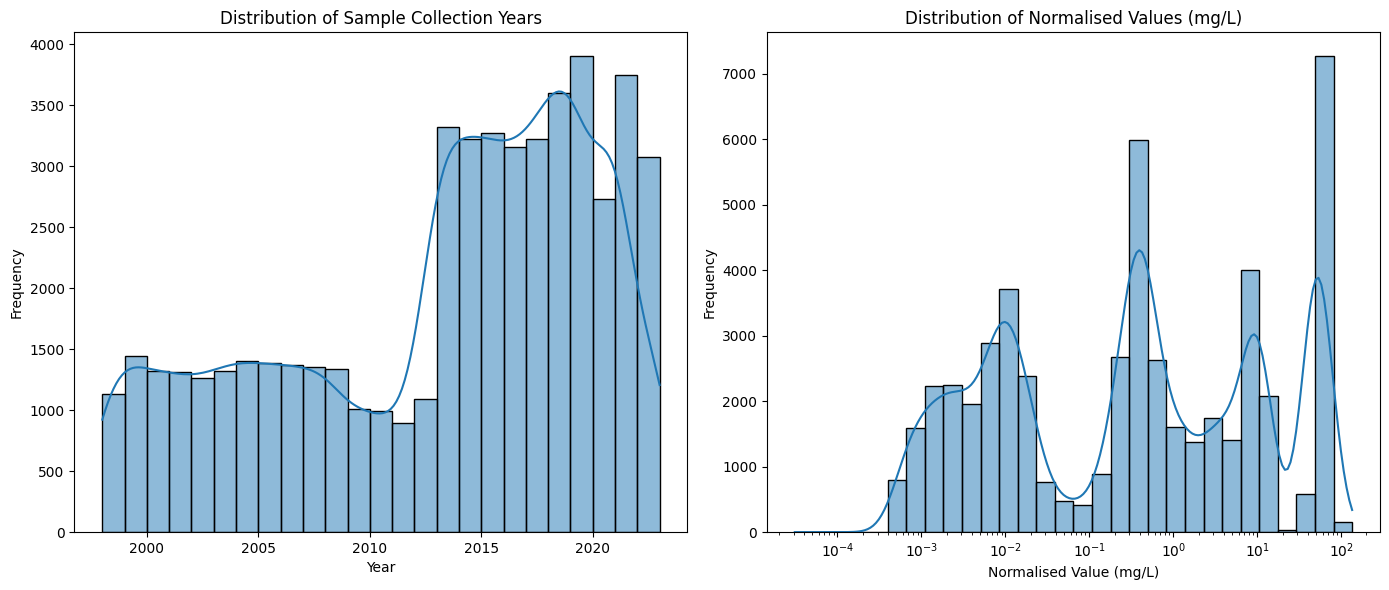

In [ ]:
#year vs value
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of sample collection years
sns.histplot(df['Year'].dropna(), bins=int(df['Year'].max() - df['Year'].min()), kde=True, ax=ax[0])
ax[0].set_title('Distribution of Sample Collection Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Frequency')

# Distribution of normalized values (mg/L)
sns.histplot(df['Normalised_value(mg/L)'], bins=30, kde=True, ax=ax[1], log_scale=True)
ax[1].set_title('Distribution of Normalised Values (mg/L)')
ax[1].set_xlabel('Normalised Value (mg/L)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Distribution of Sample Collection Years:

- The distribution of sample collection years shows how the frequency of samples varies over time.
It appears that sampling has been conducted across a range of years, which could provide a good temporal
dataset for analyzing trends in water quality over time.
- The kernel density estimation (KDE) curve overlaid on the histogram suggests the distribution's shape,
indicating periods of higher or lower sampling intensity.

Distribution of Normalized Values (mg/L):

- The distribution of normalized values (in mg/L) for the water quality parameters illustrates the wide range of measurements present in the dataset.
The use of a log scale helps to better visualize the distribution since water quality parameters can vary over several orders of magnitude.


## MDL, RDL

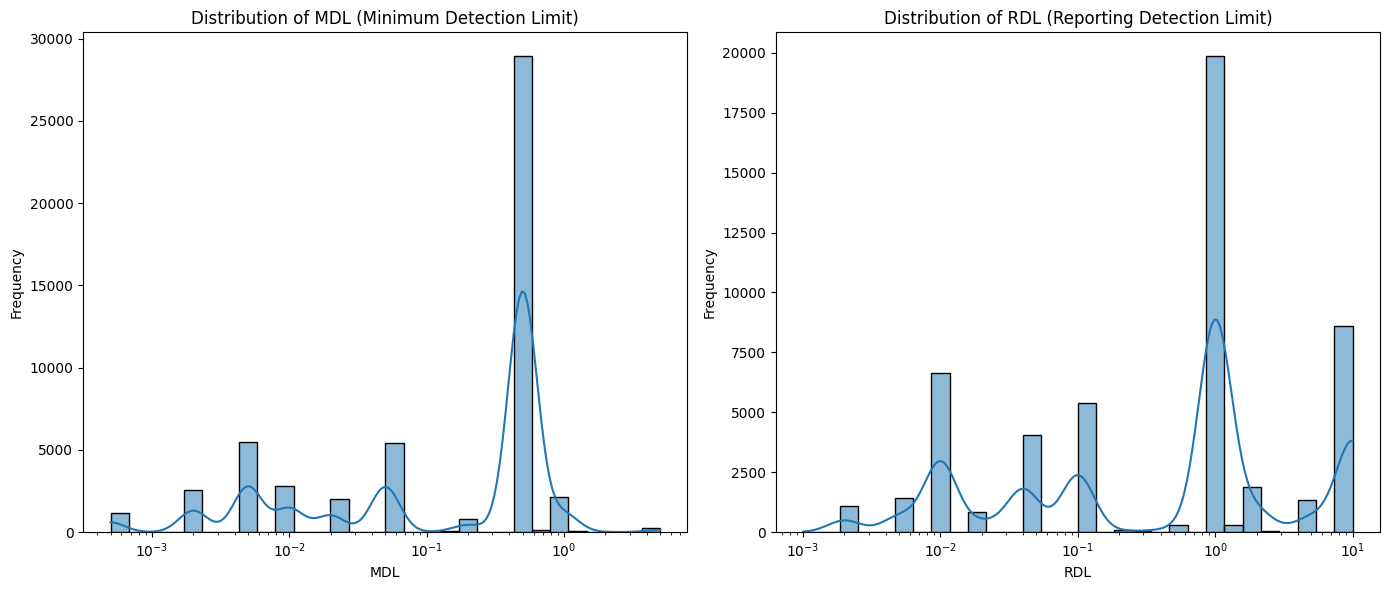

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of MDL (Minimum Detection Limit)
sns.histplot(df['MDL'], bins=30, kde=True, ax=ax[0], log_scale=True)
ax[0].set_title('Distribution of MDL (Minimum Detection Limit)')
ax[0].set_xlabel('MDL')
ax[0].set_ylabel('Frequency')

# Distribution of RDL (Reporting Detection Limit)
sns.histplot(df['RDL'], bins=30, kde=True, ax=ax[1], log_scale=True)
ax[1].set_title('Distribution of RDL (Reporting Detection Limit)')
ax[1].set_xlabel('RDL')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


MDL (Minimum Detection Limit): The distribution shows that most of the MDL values are clustered at the lower end of the scale,
but there's a wide range overall. The log scale indicates that while many tests are highly sensitive (with low MDL values),
some tests or parameters require higher concentrations to be detectable

RDL (Reporting Detection Limit): Similar to the MDL, the RDL values are also primarily clustered at the lower end, with a wide range overall.
The RDL is typically higher than the MDL, as it includes a safety margin ensuring that reported values meet certain confidence levels.
The spread of RDL values across a log scale demonstrates the diversity in reporting standards and confidence requirements for different parameters.

The distribution plots for MDL and RDL reveal a wide range of detection and reporting thresholds,
indicating diverse sensitivity and precision across water quality parameters.
Most values are clustered at the lower end, suggesting high sensitivity for many tests,
but with significant variability reflecting the complexity of environmental monitoring.
This variability underscores the importance of understanding detection limits in interpreting water quality data.


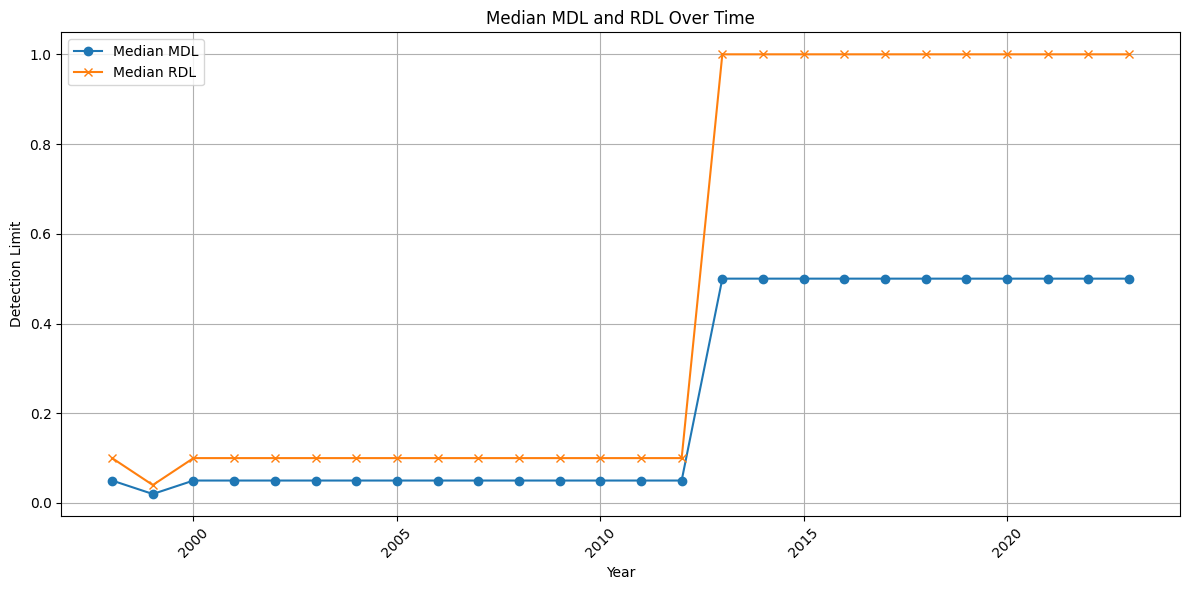

In [ ]:
median_mdl_by_year = df.groupby('Year')['MDL'].median()
median_rdl_by_year = df.groupby('Year')['RDL'].median()

plt.figure(figsize=(12, 6))
plt.plot(median_mdl_by_year.index, median_mdl_by_year.values, label='Median MDL', marker='o')
plt.plot(median_rdl_by_year.index, median_rdl_by_year.values, label='Median RDL', marker='x')
plt.title('Median MDL and RDL Over Time')
plt.xlabel('Year')
plt.ylabel('Detection Limit')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:

- Both MDL and RDL exhibit variations over the years, reflecting advancements in analytical technologies,
changes in regulatory standards, or shifts in monitoring focus.

- At certain points, the trends of MDL and RDL appear to converge or diverge, suggesting periods when the gap between detection capabilities and reporting standards narrowed or widened.
This could indicate adjustments in monitoring practices or the introduction of new guidelines for water quality reporting.

- The evolving trends in MDL and RDL over time highlight the dynamic nature of environmental monitoring,
underscoring the importance of continual improvement in analytical methods to enhance the sensitivity and accuracy of water quality assessments. ​​


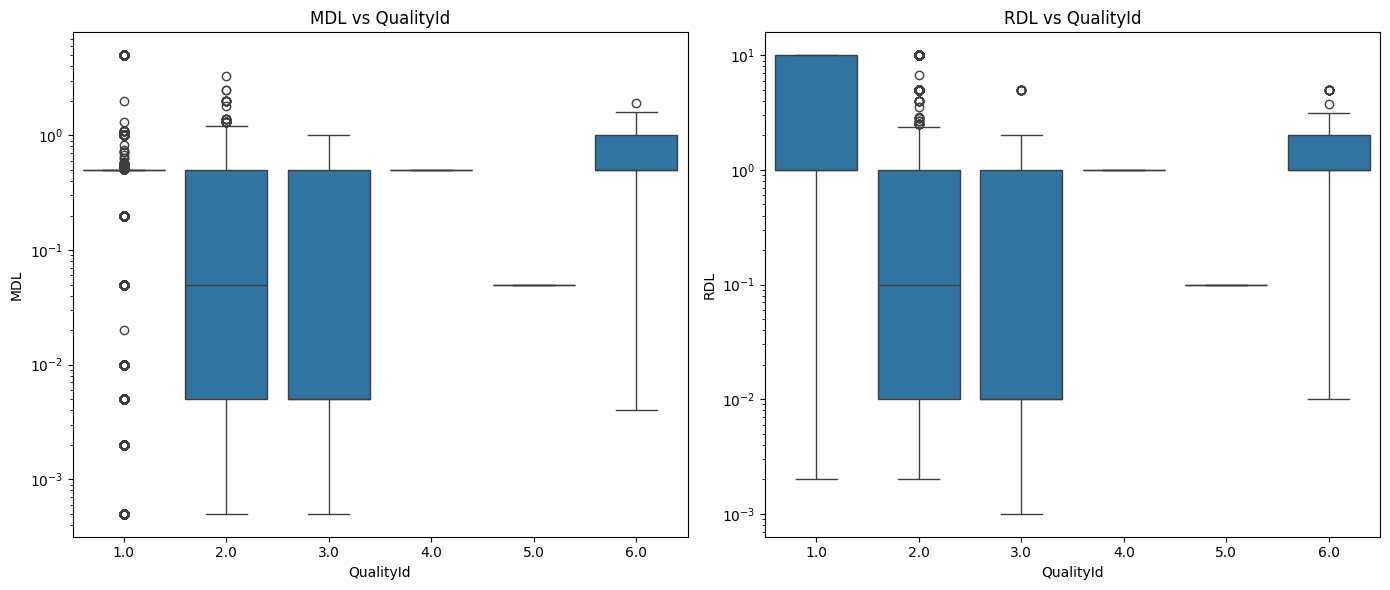

In [ ]:
plt.figure(figsize=(14, 6))

# MDL vs QualityId
plt.subplot(1, 2, 1)
sns.boxplot(x='QualityId', y='MDL', data=df)
plt.title('MDL vs QualityId')
plt.xlabel('QualityId')
plt.ylabel('MDL')
plt.yscale('log')

# RDL vs QualityId
plt.subplot(1, 2, 2)
sns.boxplot(x='QualityId', y='RDL', data=df)
plt.title('RDL vs QualityId')
plt.xlabel('QualityId')
plt.ylabel('RDL')
plt.yscale('log')

plt.tight_layout()
plt.show()


- Both MDL and RDL display a range of values across different QualityIds,
indicating variability in detection and reporting limits for samples with different quality ratings.

- There isn't a clear, consistent trend between QualityId and MDL or RDL values visible in the box plots.
This suggests that the detection and reporting limits are likely determined by the specific requirements of each test or
parameter rather than the overall quality rating of the sample.

- The log scale for MDL and RDL values highlights the wide range of detection and reporting limits, even within samples of the same QualityId.
This variability underscores the complexity of environmental monitoring, where the sensitivity and accuracy of measurements can vary significantly
depending on the parameter being measured and the technology used.